PART 1: DATA CLEANING

In [1]:
#IMPORT STATEMENTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the data set:
data_set = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data_set.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


Null Values: 
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64 

Du

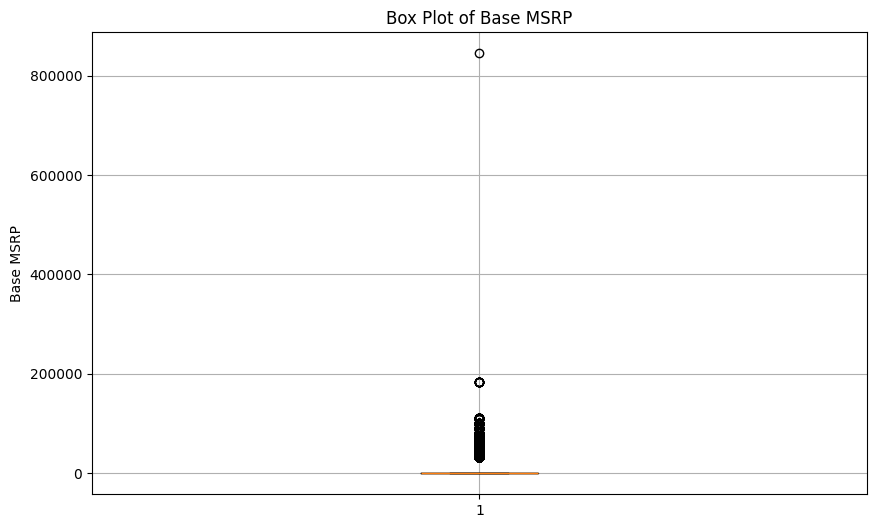

In [3]:
#Identifying duplicates, missing values and outliers
#checking for missing values:
print('Null Values: ')
print(data_set.isnull().sum(), '\n')

#checking for duplicated records:
print('Duplicate records: ')
print(data_set.duplicated().sum(),'\n')

print("Box plot showing outliers:")
#Examining to identify any outliers in the price column using box-plot:
plt.figure(figsize=(10, 6))
plt.boxplot(data_set['Base MSRP'])
plt.title('Box Plot of Base MSRP')
plt.ylabel('Base MSRP')
plt.grid()
plt.show()

In [4]:
#Checking the outlier
outlier_df = data_set[data_set['Base MSRP'] >= 800000]
outlier_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
48603,WP0CA2A13F,King,Hunts Point,WA,98004.0,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,845000,48.0,100479039,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


The Porsche 918 Spyder's base MSRP was indeed $845,000. Therefore, the outlier is a legitimate data point.
There are no duplicates but there are some columns with some missing values that need to be investigated and handled

In [5]:
missing_data = data_set[(data_set['County'].isnull()) | (data_set['Legislative District'].isnull())]
missing_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
91,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,NaN,220643132,NaN,NaN,NaN
75359,7SAYGDEE8N,Stafford,Stafford,VA,22554.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,223816197,POINT (-77.410205 38.42543),NON WASHINGTON STATE ELECTRIC UTILITY,5.117901e+10
77137,1G1FZ6S00K,Washoe,Reno,NV,89521.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,NaN,231094930,POINT (-119.7280247 39.4154826),NON WASHINGTON STATE ELECTRIC UTILITY,3.203100e+10
79747,7SAYGDEE4P,Sonoma,Healdsburg,CA,95448.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,230255847,POINT (-122.8696164 38.6171774),NON WASHINGTON STATE ELECTRIC UTILITY,6.097154e+09
81185,5YJSA1E54P,District of Columbia,Washington,DC,20003.0,2023,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,238713044,POINT (-76.985835 38.88411),NON WASHINGTON STATE ELECTRIC UTILITY,1.100101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180177,7SAYGDEF6P,Santa Barbara,Lompoc,CA,93436.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,262433769,POINT (-120.454675 34.642185),NON WASHINGTON STATE ELECTRIC UTILITY,6.083003e+09
180341,YV4ED3UL1P,Pima,Tucson,AZ,85718.0,2023,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,228303218,POINT (-110.9156341 32.3050619),NON WASHINGTON STATE ELECTRIC UTILITY,4.019005e+09
180921,5YJYGDEE0M,Fairfax,Herndon,VA,20171.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,170803944,POINT (-77.405463 38.929188),NON WASHINGTON STATE ELECTRIC UTILITY,5.105948e+10
181305,1V2CMPE80P,San Diego,San Diego,CA,92124.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,261635748,POINT (-117.096935 32.824435),NON WASHINGTON STATE ELECTRIC UTILITY,6.073010e+09


In [6]:
#Replacing the missing data with 0 in the case of numeric data and Unkown on string characters
# Replace missing values based on data types

for column in data_set.columns:
    if data_set[column].dtype == 'object':
        data_set[column] = data_set[column].fillna('Unknown')  # For object columns
    elif pd.api.types.is_numeric_dtype(data_set[column]):
        data_set[column] = data_set[column].fillna(0)  # For numeric columns



print('Null values:') 
print(data_set.isnull().sum())
print()
print("\nDataFrame after replacing missing values:")
data_set

Null values:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


DataFrame after replacing missing val

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [7]:
#Converting categorical data into numeric data
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Electric vehicle Type' column
data_set['EV_type_ecoded'] = label_encoder.fit_transform(data_set['Electric Vehicle Type'])

# Encode the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column
data_set['CAFV_encoded'] = label_encoder.fit_transform(data_set['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])


print("\nDataFrame after Label Encoding:")
data_set


DataFrame after Label Encoding:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV_type_ecoded,CAFV_encoded
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1,2
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10,1,2
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10,0,0
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10,1,2
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,0,1
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10,1,2
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0,1
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,0,0


PART 2: EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
#checking the shape and size of the data set
print('Shape of data frame: ')
print(data_set.shape,'\n')

print('Size of the data frame: ')
print(data_set.size)

Shape of data frame: 
(181458, 19) 

Size of the data frame: 
3447702


In [9]:
#Data Types of the columns in the data set
print('Data types: ', '\n')
print( data_set.dtypes)

Data types:  

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Cens

In [10]:
#Summary statistics
print("Summary Statistics", '\n')
data_set.describe()

Summary Statistics 



,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,EV_type_ecoded,CAFV_encoded
count,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,1.814580e+05,1.814580e+05,181458.000000,181458.000000
mean,98172.427631,2020.581793,57.826665,1040.236749,29.043062,2.214128e+08,5.297488e+10,0.217599,0.741516
std,2447.000450,2.991140,91.396074,8228.989085,14.938191,7.528561e+07,1.609343e+09,0.412614,0.641201
min,0.000000,1997.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000e+00,0.000000,0.000000
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.830687e+08,5.303301e+10,0.000000,0.000000
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.289155e+08,5.303303e+10,0.000000,1.000000
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.561320e+08,5.305307e+10,0.000000,1.000000
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10,1.000000,2.000000


PART 3 : VISUALIZATIONS

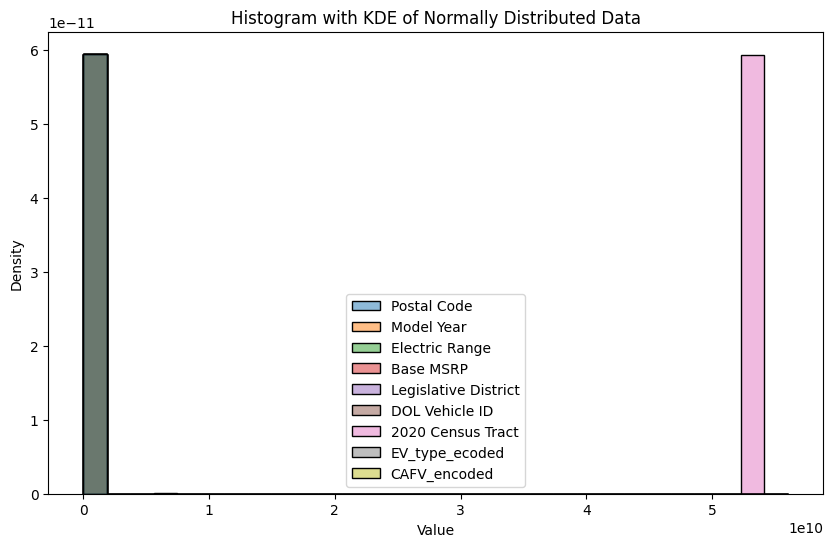

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a seaborn style histogram with a kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data_set, bins=30, color='blue', stat='density', alpha=0.5)

# Add a title and labels
plt.title('Histogram with KDE of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Boxplot of numeric variables')

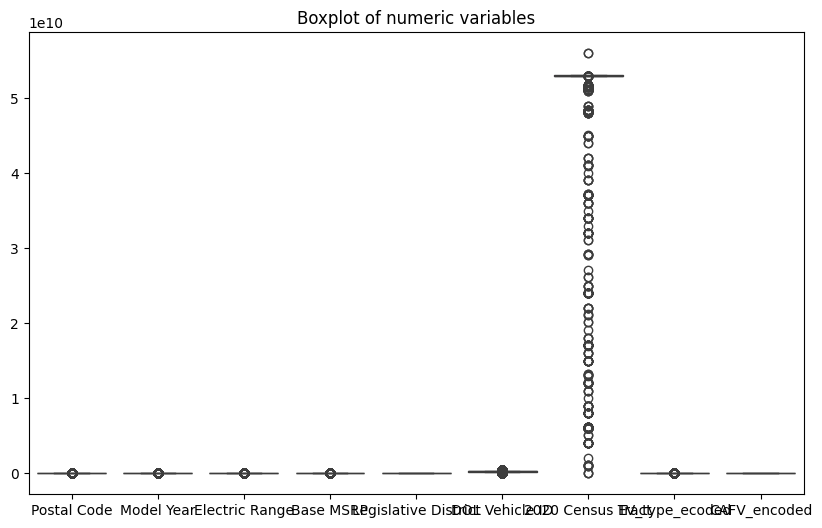

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_set)

# Add a title
plt.title('Boxplot of numeric variables')

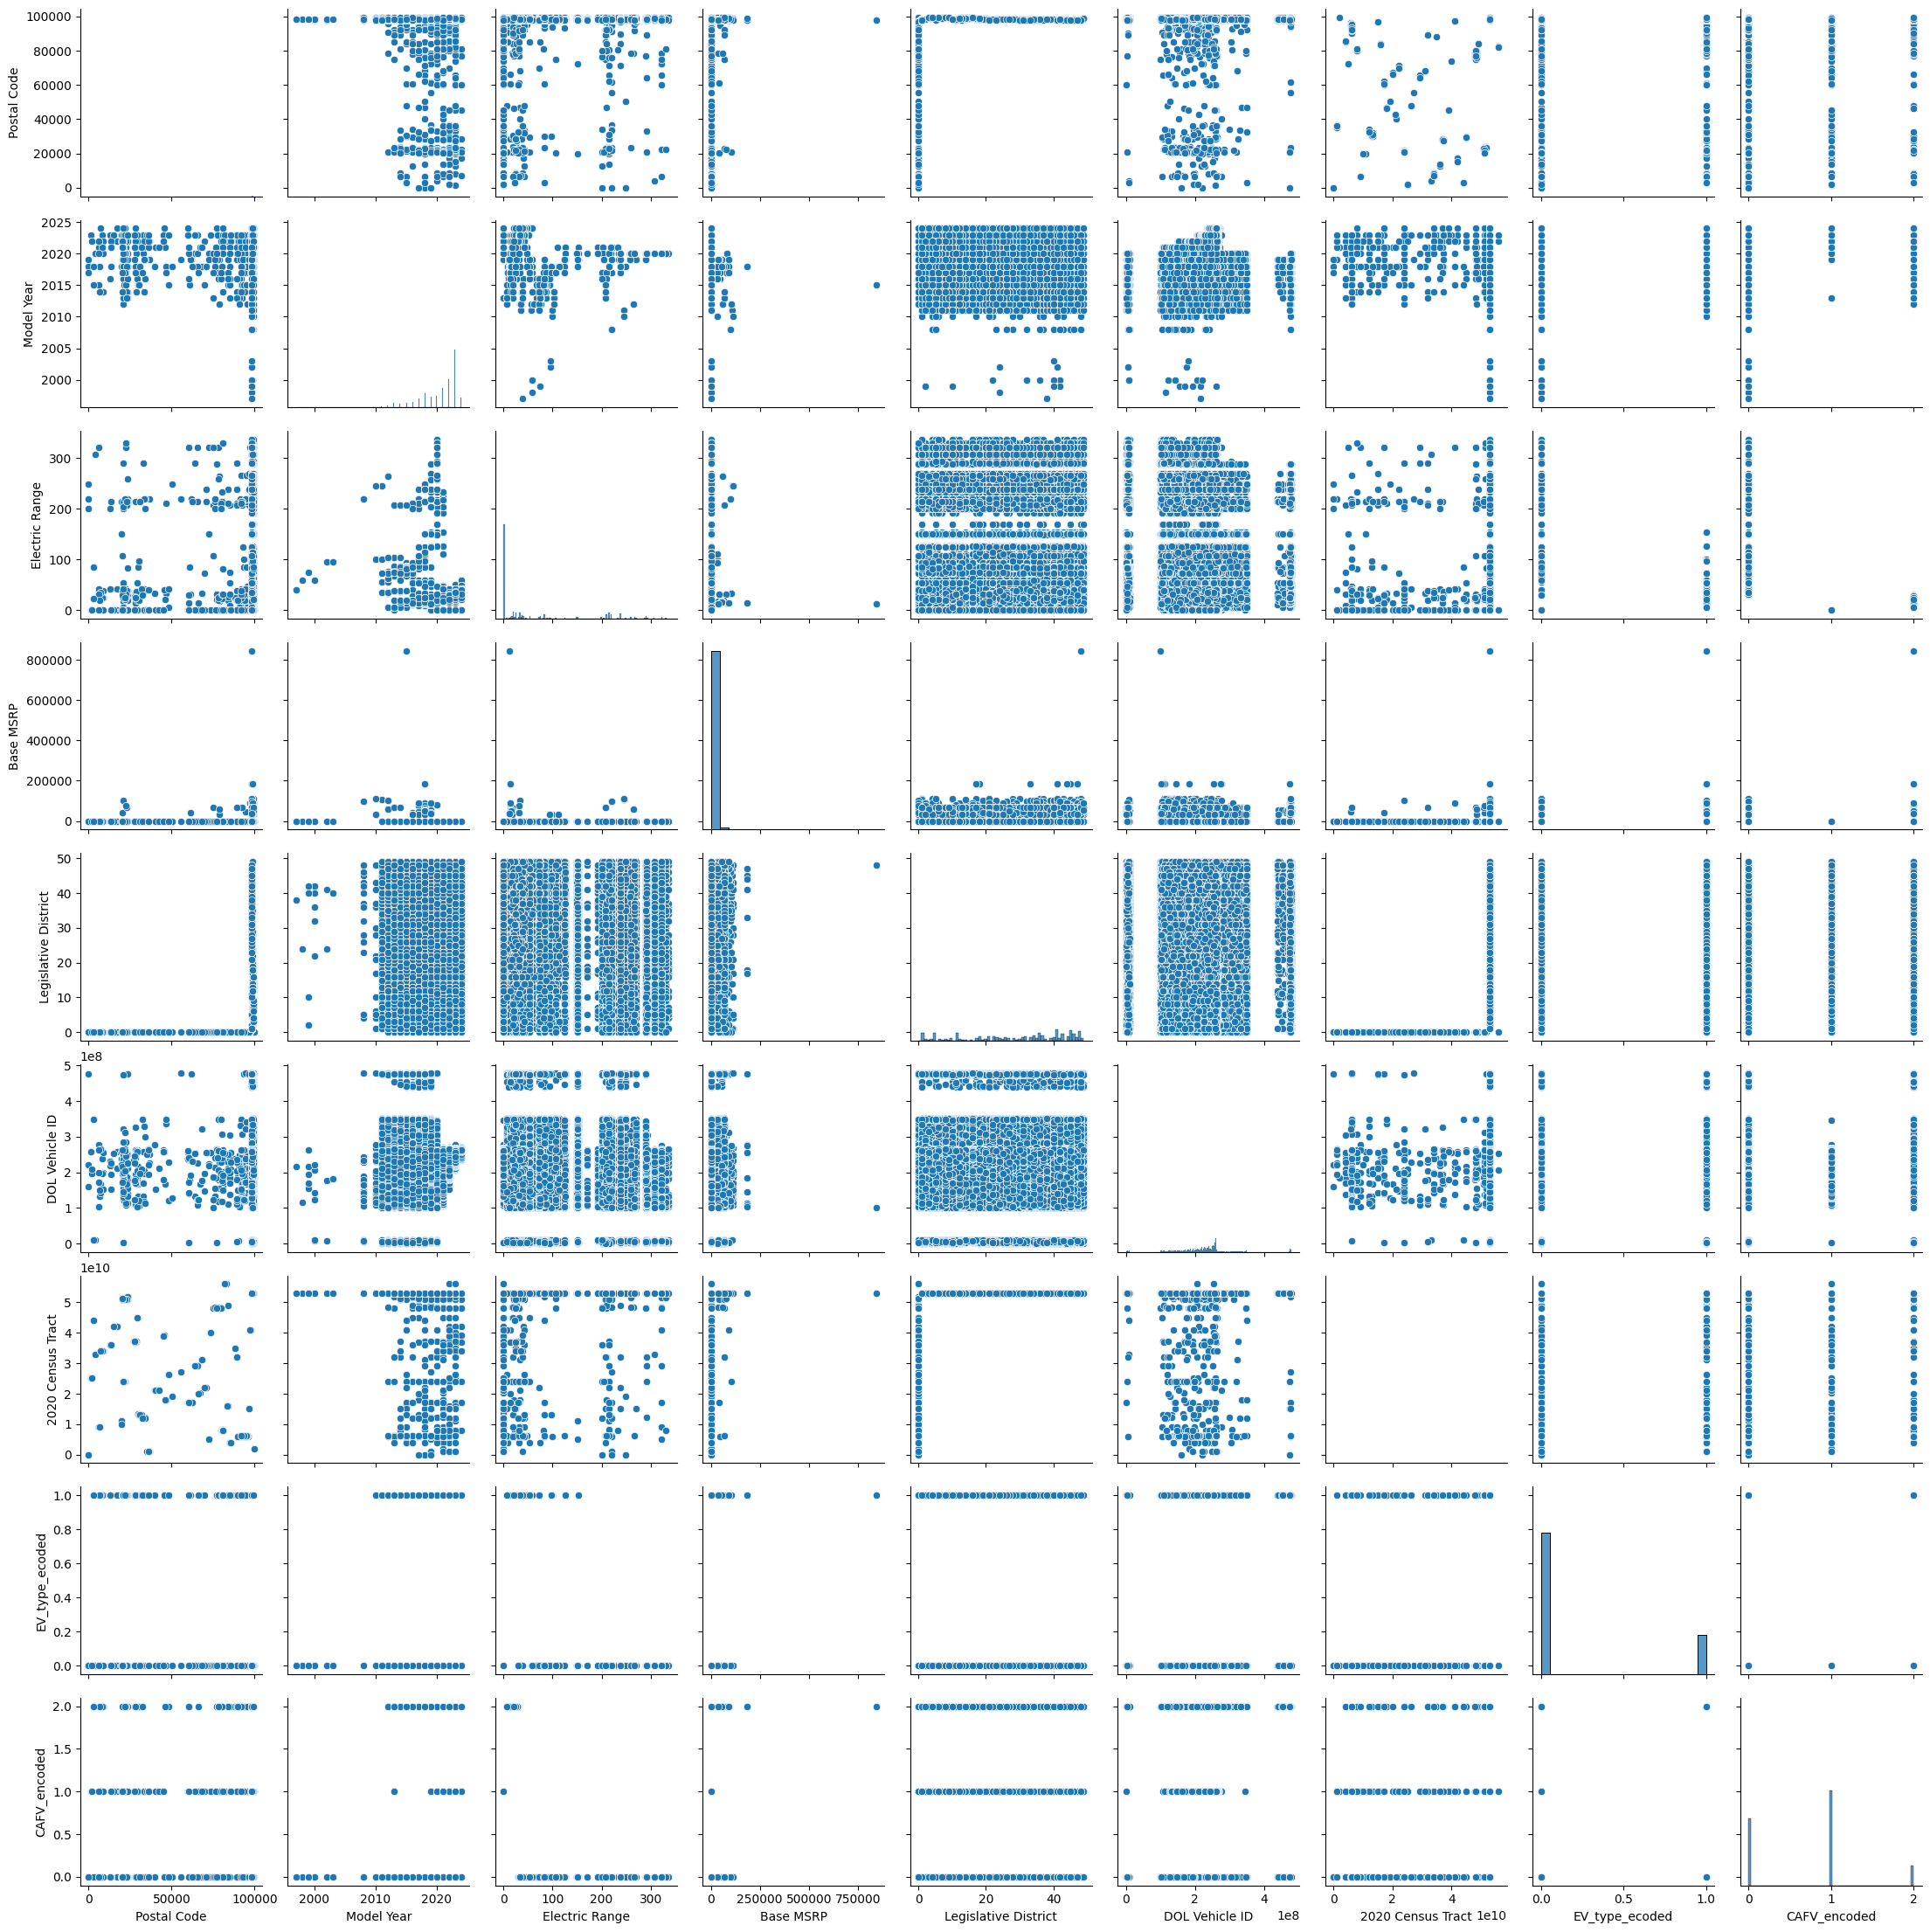

In [13]:
sns.pairplot(data_set)

DATA ANALYSIS:
PART 1: Market Trends & Adoption Patterns

In [14]:
#a)	What is the total number of electric vehicles (EVs) registered in Washington State?
state_data=pd.DataFrame(data_set['State'].value_counts())
state_data

,count
State,
WA,181060
CA,102
VA,47
MD,32
TX,26
NC,17
CO,15
IL,15
AZ,12


Total number of EVs in Washington state is 181,060

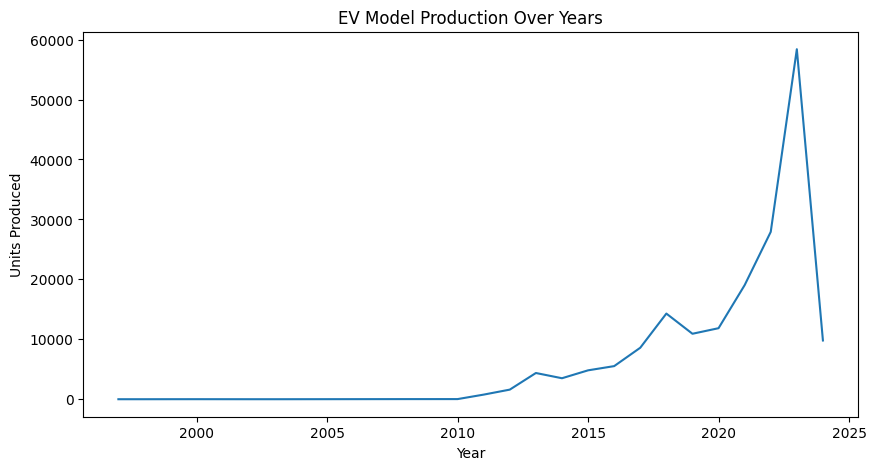

,count
Model Year,
2024,9799
2023,58393
2022,27922
2021,19034
2020,11851
2019,10922
2018,14291
2017,8591
2016,5524


In [15]:
#b)	How has EV adoption changed over the years (model year trends)?
#grouping the data by model year
model_year_data=data_set['Model Year'].value_counts()
myd_df = pd.DataFrame(model_year_data)
myd_df= myd_df.sort_values(by= 'Model Year', ascending= False)
myd_df

# visualising the trend
import matplotlib.pyplot as plt
plt.figure(figsize= (10,5))
plt.plot(myd_df)
plt.title('EV Model Production Over Years')
plt.xlabel('Year')
plt.ylabel('Units Produced')
plt.show()

print()
myd_df

In [16]:
# c)	Which brands and models are the most popular among EV owners?
# Top make and model
# Step 1: Group by 'Make' and 'Model' and sum the 'Count'
grouped_df = data_set.groupby(['Make', 'Model'], as_index=False)['State'].count()

# Step 2: Sort the DataFrame by 'Count' in descending order
sorted_df = grouped_df.sort_values(by='State', ascending=False)

# Step 3: Get the top model and make
top_model_make = sorted_df.head(5)
top_model_make.rename(columns={'State':'Count'}, inplace=True)
# Display the top model and make
print("\nTop Model and Make:")
top_model_make


Top Model and Make:


C:\Users\HP\AppData\Local\Temp\ipykernel_15088\1650674306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_model_make.rename(columns={'State':'Count'}, inplace=True)


,Make,Model,Count
124,TESLA,MODEL Y,37007
121,TESLA,MODEL 3,30150
105,NISSAN,LEAF,13356
122,TESLA,MODEL S,7731
36,CHEVROLET,BOLT EV,6935


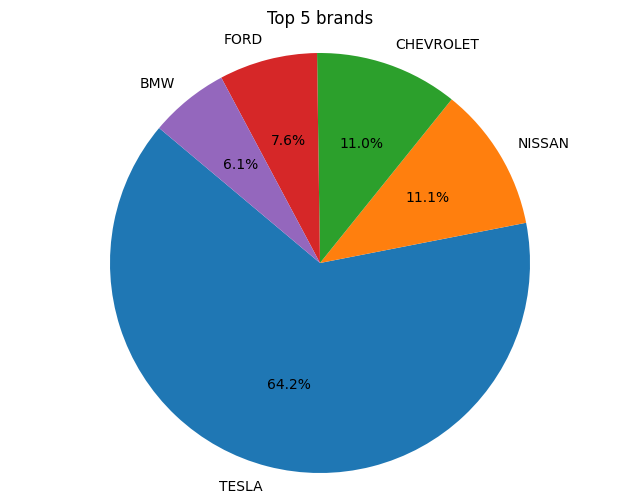

Top Brand: 


,count
Make,
TESLA,80819
NISSAN,14037
CHEVROLET,13864
FORD,9527
BMW,7680


In [17]:
#Top Brands and Models visualization

brand_df=pd.DataFrame(data_set['Make'].value_counts())
top_5_brands = brand_df.head(5)

plt.figure(figsize=(8, 6))
plt.pie(top_5_brands['count'], labels=top_5_brands.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Top 5 brands')
plt.show()

#top 5 brand makes:
print("Top Brand: ")
brand_df.head(5)

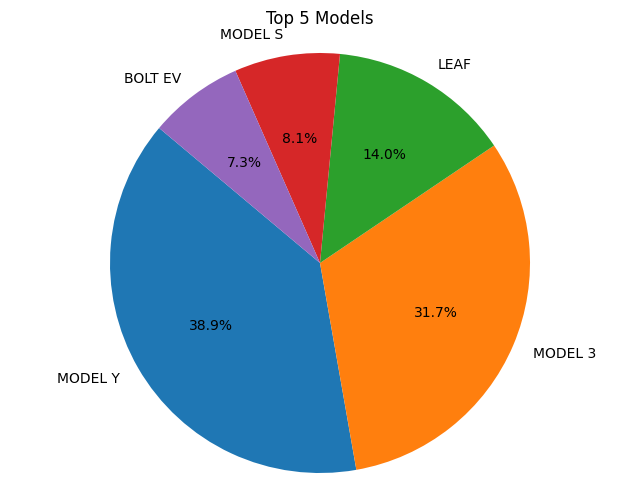

,count
Model,
MODEL Y,37007
MODEL 3,30150
LEAF,13356
MODEL S,7731
BOLT EV,6935


In [18]:
model_df=pd.DataFrame(data_set['Model'].value_counts())
top_5_models = model_df.head(5)

plt.figure(figsize=(8, 6))
plt.pie(top_5_models['count'], labels=top_5_models.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Top 5 Models')
plt.show()

model_df.head(5)


In [19]:
#d)	What is the distribution of battery electric vehicles (BEVs) vs. plug-in hybrid electric vehicles (PHEVs)?
##Distribustion of BEVs vs. PHEVs
print('Electric Vehicle Types: ')
EVT = pd.DataFrame(data_set['Electric Vehicle Type'].value_counts())
print(EVT,'\n')

BEV_count = EVT['count'].iloc[0]
PHEV_count = EVT['count'].iloc[1]

total= BEV_count + PHEV_count
print('Proportion of Battery Electric Vehiles: ')
print((BEV_count/total)*100, '%')

print('Proportion of Plug-in Highbrid Electric Vehiles: ')
print((PHEV_count/total)*100,'%')

Electric Vehicle Types: 
                                         count
Electric Vehicle Type                         
Battery Electric Vehicle (BEV)          141973
Plug-in Hybrid Electric Vehicle (PHEV)   39485 

Proportion of Battery Electric Vehiles: 
78.24014372471866 %
Proportion of Plug-in Highbrid Electric Vehiles: 
21.759856275281333 %


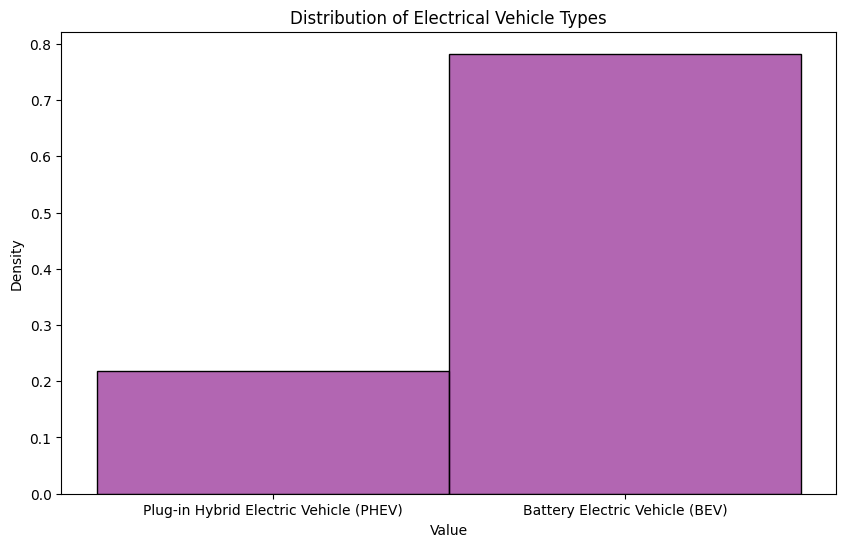

In [20]:
#Visulaisation of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_set['Electric Vehicle Type'], bins=40, color='purple', stat='density', alpha=0.6)

# Add a title and labels
plt.title('Distribution of Electrical Vehicle Types')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

PART 2: Vehicle Performance & Range Analysis 

In [42]:
#e)	What is the average electric range of EVs in the dataset?
s_set= data_set[data_set['Electric Range']!=0]
print(s_set['Electric Range'].mean())

120.98873489530486


In [23]:
#f)	Which models offer the longest and shortest electric ranges?
range_subset= data_set[data_set['Electric Range']!= 0] # removing the rows with range of 0
model_range_df = range_subset.groupby('Model', as_index=False)['Electric Range'].mean()
range_data =model_range_df.sort_values(by= 'Electric Range', ascending= False)
print('Top 5 models with longest range:')
print(range_data.head(5), '\n')

print("Bottom 5 models with shortest range: ")
print(range_data.tail(5))

Top 5 models with longest range:
      Model  Electric Range
53  MODEL Y      291.000000
48     KONA      258.000000
15  BOLT EV      244.578313
52  MODEL X      240.591793
50  MODEL 3      238.191700 

Bottom 5 models with shortest range: 
            Model  Electric Range
11         ACCORD       13.000000
37      GLC-CLASS       12.063415
7             918       12.000000
16        C-CLASS        8.473684
61  PRIUS PLUG-IN        6.000000


In [24]:
#g)	Is there a correlation between model year and electric range improvements?

# Calculate the correlation coefficient
correlation = range_subset['Model Year'].corr(range_subset['Electric Range'])
print(f'Correlation between Electric Range and Model Year: {correlation:.2f}')

Correlation between Electric Range and Model Year: -0.07


Correlation between Electric Range and Model Year: -0.07. The newer the model the less electric range the car has by .07 units of range.

In [25]:
grouped_by_year = range_subset.groupby('Model Year', as_index=False)['Electric Range'].mean()
grouped_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.976623
9,2012,61.618216


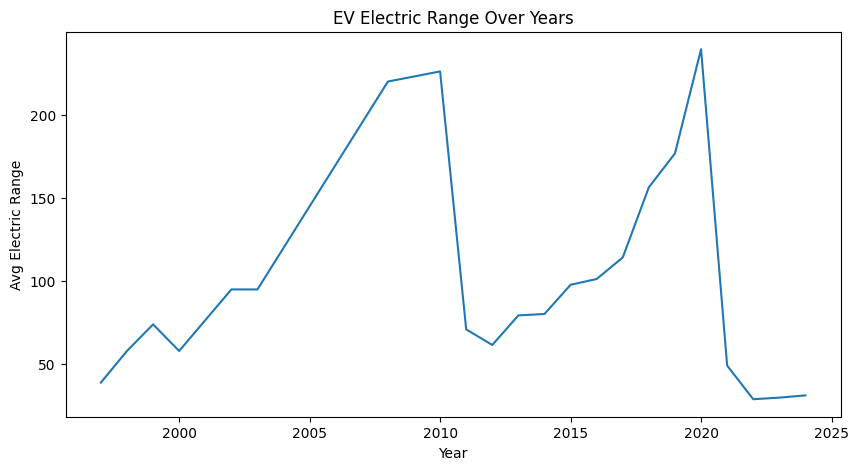

In [26]:
#Plotting the line chart
plt.figure(figsize= (10,5))
plt.plot(grouped_by_year['Model Year'], grouped_by_year['Electric Range'])
plt.title('EV Electric Range Over Years')
plt.xlabel('Year')
plt.ylabel('Avg Electric Range')
plt.show()

PART 3: Regional Distribution & Ownership Insights 

In [27]:
#Top City
#n)	Which counties or cities in Washington have the highest number of EVs?
top_city = pd.DataFrame(data_set['City'].value_counts())
print('Top 5 cities with the highest number of EVs')
top_city.head(5)


Top 5 cities with the highest number of EVs


,count
City,
Seattle,30045
Bellevue,9117
Redmond,6568
Vancouver,6329
Bothell,5961


In [28]:
#Top County
top_county = pd.DataFrame(data_set['County'].value_counts())
print('Top 5 counties with the highest number of EVs')
top_county.head(5)

Top 5 counties with the highest number of EVs


,count
County,
King,94460
Snohomish,21439
Pierce,14043
Clark,10675
Thurston,6600


In [29]:

# Function to extract x and y coordinates with error handling
def extract_coordinates(point_str):
    try:
        # Remove "POINT (" and ")" and split the string
        coordinates_str = point_str.replace("POINT (", "").replace(")", "")
        x, y = map(float, coordinates_str.split())
        return x, y
    except (ValueError, AttributeError):
        # Return None or some default value for invalid entries
        return None, None

# Apply the function to the 'geometry' column

data_set[['x', 'y']] = data_set['Vehicle Location'].apply(lambda point: pd.Series(extract_coordinates(point)))

print("\nDataFrame with Extracted Coordinates:")
data_set


DataFrame with Extracted Coordinates:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV_type_ecoded,CAFV_encoded,x,y
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1,2,-122.374105,47.544680
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10,1,2,-122.943445,47.059252
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10,0,0,-122.780830,47.083975
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10,1,2,-122.854030,46.856085
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,0,0,-120.524012,46.597394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,0,1,-120.286740,47.417600
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10,1,2,-117.245490,47.653400
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0,1,-121.989530,47.203470
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,0,0,-122.528603,45.668660


PART 4: Electric Vehicle Cost & Affordability 

In [30]:
#Are there correlations between price and range, model year, or vehicle type?
price_subset = data_set[(data_set['Base MSRP']!=0) & (data_set['Electric Range']!=0)] # removing entries with 0 from price and range
subset = price_subset[['Base MSRP','Electric Range', 'Model Year', 'EV_type_ecoded']]


correlation0 = subset.corr()
correlation0


,Base MSRP,Electric Range,Model Year,EV_type_ecoded
Base MSRP,1.000000,0.405602,-0.460762,-0.149901
Electric Range,0.405602,1.000000,-0.934437,-0.871597
Model Year,-0.460762,-0.934437,1.000000,0.797240
EV_type_ecoded,-0.149901,-0.871597,0.797240,1.000000


There is a  moderate correlation between Base MSRP and Electric Range and Model Year. The more the electric range offered the more the price and the earlier the model the lesser the  base price.

In [31]:
grouped_by_price = price_subset.groupby('Model Year', as_index=False)['Base MSRP'].mean()
grouped_by_price

,Model Year,Base MSRP
0,2008,98950.000000
1,2010,100781.956522
2,2011,109000.000000
3,2012,63184.397163
4,2013,69900.000000
5,2014,69900.000000
6,2015,845000.000000
7,2016,32220.460358
8,2017,39351.401674
9,2018,53880.708841


In [32]:

# Sample CPI data
cpi_data = {
    'Model Year': [2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'CPI': [
        215.3, 218.1, 224.9, 229.6, 233.0, 236.5, 237.0, 240.0,
        245.1, 251.1, 255.7, 258.8
    ]
}
df_cpi = pd.DataFrame(cpi_data)

# Merge the MSRP data with CPI data
merged_df = pd.merge(grouped_by_price, df_cpi, on='Model Year', how='left')

# Get the latest CPI value (for 2020 in this case)
current_cpi = df_cpi['CPI'].iloc[-1]

# Calculate the adjusted price
merged_df['Adjusted MSRP'] = merged_df['Base MSRP'] * (current_cpi / merged_df['CPI'])

# Display the results
print(merged_df[['Model Year', 'Base MSRP', 'Adjusted MSRP']])

    Model Year      Base MSRP  Adjusted MSRP
0         2008   98950.000000  118942.220158
1         2010  100781.956522  119589.043319
2         2011  109000.000000  125429.968875
3         2012   63184.397163   71220.043492
4         2013   69900.000000   77640.000000
5         2014   69900.000000   76490.993658
6         2015  845000.000000  922725.738397
7         2016   32220.460358   34744.396419
8         2017   39351.401674   41550.970025
9         2018   53880.708841   55532.964748
10        2019   44478.036481   45017.269618
11        2020   81100.000000   81100.000000


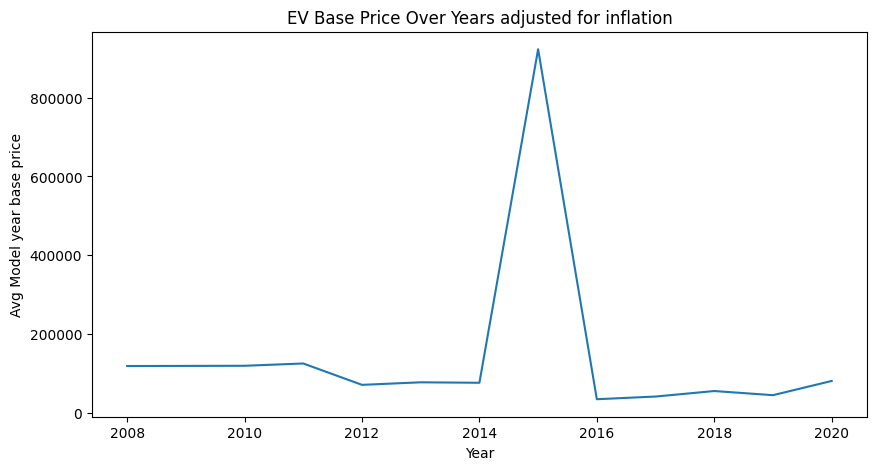

In [33]:
plt.figure(figsize= (10,5))
plt.plot(merged_df['Model Year'], merged_df['Adjusted MSRP'])
plt.title('EV Base Price Over Years adjusted for inflation')
plt.xlabel('Year')
plt.ylabel('Avg Model year base price')
plt.show()

PART 5: CHARGING INFRASTRUCTURE & RANGE AXIETY

In [34]:
#	Are there differences in adoption rates for EVs with short vs. long electric ranges?
range_threshhold = 300
data_set['Range type']= data_set['Electric Range']
data_set['Range type'] = np.where(data_set['Electric Range'] < range_threshhold, 'Short Range', 'Long Range')
data_set

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV_type_ecoded,CAFV_encoded,x,y,Range type
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1,2,-122.374105,47.544680,Short Range
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10,1,2,-122.943445,47.059252,Short Range
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10,0,0,-122.780830,47.083975,Short Range
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10,1,2,-122.854030,46.856085,Short Range
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,0,0,-120.524012,46.597394,Long Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,0,1,-120.286740,47.417600,Short Range
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10,1,2,-117.245490,47.653400,Short Range
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0,1,-121.989530,47.203470,Short Range
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,0,0,-122.528603,45.668660,Long Range


In [35]:
data_set['Range type'].value_counts()

Range type
Short Range    178857
Long Range       2601
Name: count, dtype: int64

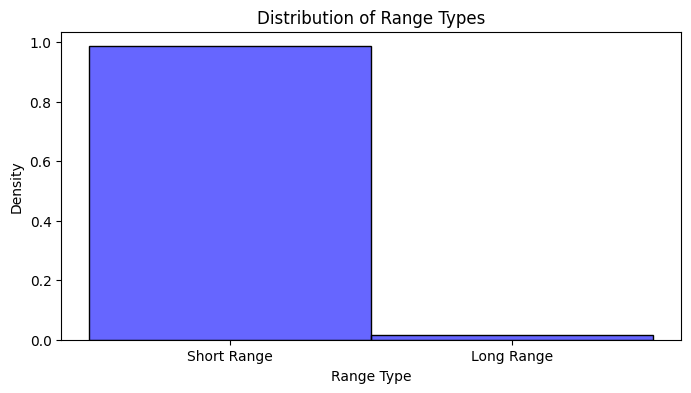

In [36]:
#Visulaisation of the distribution
plt.figure(figsize=(8, 4))
sns.histplot(data_set['Range type'], bins=10, color='blue', stat='density', alpha=0.6)

# Add a title and labels
plt.title('Distribution of Range Types')
plt.xlabel('Range Type')
plt.ylabel('Density')

# Show the plot
plt.show()

In [37]:
#	Do certain regions have more EVs with longer ranges, possibly due to charging availability?

#data_set.groupby(['County','Range type'], as_index=False)['State'].count()
df0= data_set.groupby(['County',  'Range type']).size().unstack(fill_value=0)
df1 = data_set.groupby('County', as_index=False)['Electric Utility'].count()
merged = pd.merge(df0, df1, on='County', how='inner')
merged

,County,Long Range,Short Range,Electric Utility
0,Ada,0,2,2
1,Adams,1,51,52
2,Alameda,0,4,4
3,Albemarle,0,2,2
4,Alexandria,2,1,3
...,...,...,...,...
189,Worcester,0,1,1
190,Yakima,25,1009,1034
191,Yolo,0,1,1
192,York,0,1,1


More data on charging availability is needed to answer the question

PART 6: Brand Loyalty & Manufacturer Competition 

In [38]:
#Which manufacturers have gained or lost market share over the past decade?
decade_data= data_set[data_set['Model Year']>= 2014]
dec_grouped= decade_data.groupby([ 'Model Year', 'Make'], as_index= False).size()
dec_grouped

,Model Year,Make,size
0,2014,BMW,422
1,2014,CADILLAC,56
2,2014,CHEVROLET,716
3,2014,FIAT,96
4,2014,FORD,594
...,...,...,...
220,2024,ROLLS ROYCE,1
221,2024,SUBARU,3
222,2024,TESLA,1922
223,2024,TOYOTA,596


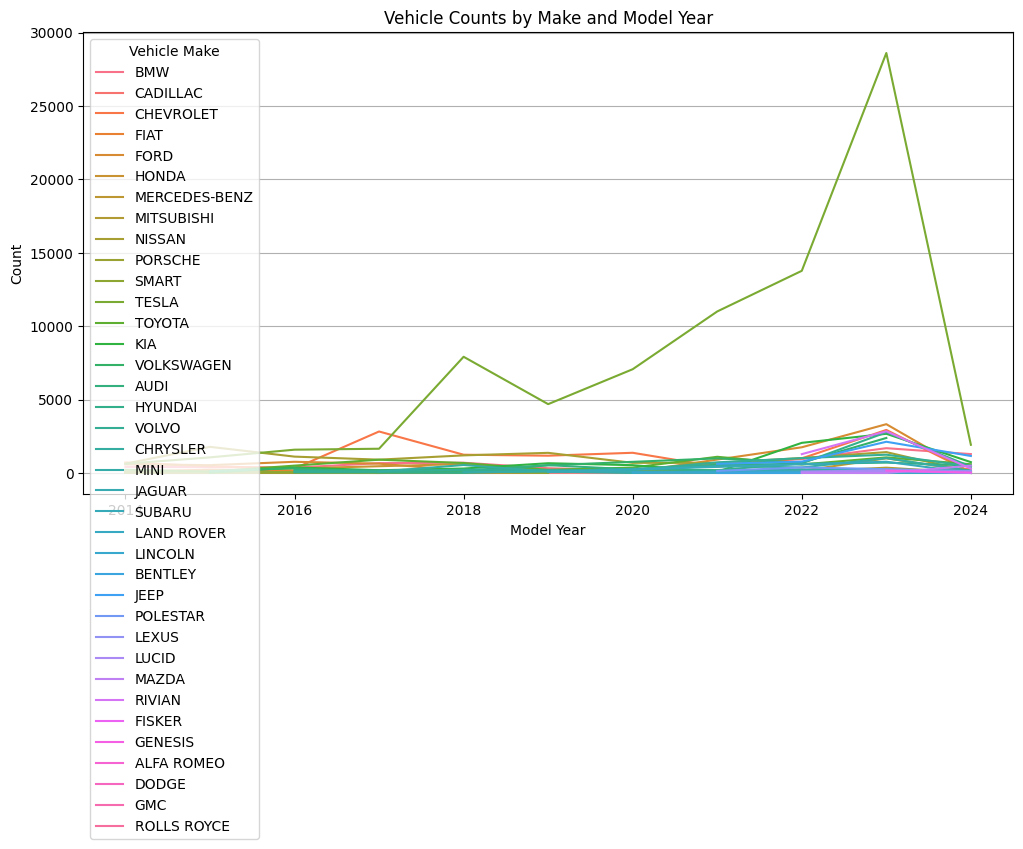

In [39]:
#Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=dec_grouped, x=dec_grouped['Model Year'], y=dec_grouped['size'], hue=dec_grouped['Make'])

# Add titles and labels
plt.title('Vehicle Counts by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='Vehicle Make')
plt.grid(axis='y')
plt.show()

DEMOGRAPHICS AND SOCIO-ECONOMIC FACTORS

In [40]:
#Do certain communities prefer BEVs over PHEVs, and why?
ev_type= data_set.groupby(['County',  'Electric Vehicle Type']).size().unstack(fill_value=0)

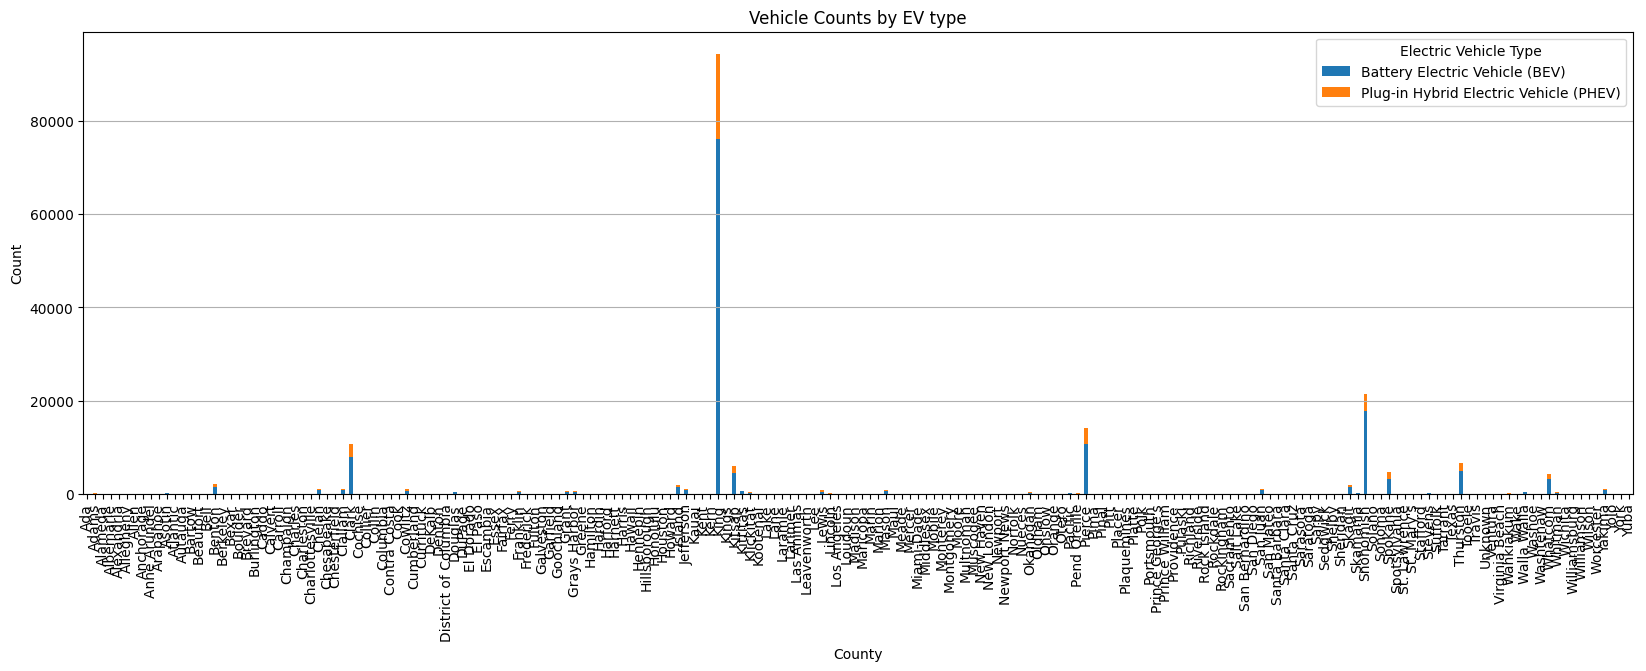

In [41]:
ev_type.plot(kind='bar', stacked=True, figsize=(20, 6))

# Add titles and labels
plt.title('Vehicle Counts by EV type')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.grid(axis='y')
plt.show()

FUTURE PROJECTIONS & ADOPTION FORECASTING

In [58]:
#regression analysis for prediction:
not_null= data_set[(data_set['Base MSRP']!=0)&(data_set['Electric Range']!=0)]
not_null.rename(columns={
    'Base MSRP': 'Base_MSRP',
    'Electric Range': 'Electric_Range',
    'EV_type_ecoded': 'EV_type_encoded'
}, inplace=True)

not_null

C:\Users\HP\AppData\Local\Temp\ipykernel_15088\1524113713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null.rename(columns={


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV_type_encoded,CAFV_encoded,x,y,Range type
119,5YJSA1CG7D,King,Bellevue,WA,98004.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,48.0,9618535,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,0,0,-122.202397,47.619252,Short Range
170,5YJSA1H12E,King,Redmond,WA,98052.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,48.0,176021485,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,0,0,-122.120738,47.670537,Short Range
171,YV4BR0PL2J,King,Kirkland,WA,98033.0,2018,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,45.0,348194150,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1,2,-122.202640,47.678500,Short Range
318,2C4RC1N77K,King,Burien,WA,98146.0,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,34.0,476548103,POINT (-122.3551826 47.5000521),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10,1,0,-122.355183,47.500052,Short Range
326,WBAJA9C55K,King,Bellevue,WA,98006.0,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,41.0,474956191,POINT (-122.16937 47.571015),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,1,2,-122.169370,47.571015,Short Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181180,5YJSA1DNXD,King,Kent,WA,98032.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,33.0,242648143,POINT (-122.235475 47.3809),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,0,0,-122.235475,47.380900,Short Range
181210,KNDJP3AE0G,King,Seattle,WA,98119.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,36.0,183895785,POINT (-122.36731 47.6377681),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,0,0,-122.367310,47.637768,Short Range
181264,WBAJA9C58J,Pierce,Tacoma,WA,98406.0,2018,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,27.0,200797103,POINT (-122.490985 47.26365),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,1,2,-122.490985,47.263650,Short Range
181297,5YJSA1H19E,Spokane,Spokane,WA,99205.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,6.0,194586773,POINT (-117.42694 47.67946),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10,0,0,-117.426940,47.679460,Short Range


In [66]:
#Variable selection
not_null.rename(columns={
    'Model Year': 'Model_Year'
}, inplace=True)
x= not_null[['EV_type_encoded','Electric_Range','Make','Model_Year']]
y= not_null[['Base_MSRP']]

C:\Users\HP\AppData\Local\Temp\ipykernel_15088\3699798468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null.rename(columns={


In [67]:
#dividing the data set to training and testing parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42)

In [ ]:
#OLS formula
ols_formula = 'Base_MSRP~ Electric_Range+C(Make)+EV_type_encoded'

In [69]:
from statsmodels.formula.api import ols
ols_data = pd.concat([x_train,y_train], axis = 1)
OLS = ols (formula= ols_formula, data = ols_data)

In [70]:
model = OLS.fit()

In [65]:
predictions = model.predict(x_test)
predictions

3098       70578.078255
37193      69809.055941
74567      36865.517241
68038      53425.867793
11108      70578.078255
              ...      
20738      70578.078255
170307     70578.078255
74588      36865.517241
111936     70578.078255
51442     143989.628619
Length: 994, dtype: float64

In [72]:
x_test

,EV_type_encoded,Electric_Range,Make,Model_Year
3098,0,208,TESLA,2013
37193,0,220,TESLA,2008
74567,1,12,MINI,2019
68038,1,14,BMW,2018
11108,0,208,TESLA,2013
...,...,...,...,...
20738,0,208,TESLA,2014
170307,0,208,TESLA,2013
74588,1,12,MINI,2018
111936,0,208,TESLA,2014


In [73]:
y_test

,Base_MSRP
3098,69900
37193,98950
74567,36900
68038,54950
11108,69900
...,...
20738,69900
170307,69900
74588,36800
111936,69900


In [74]:
#Simple multiple regression model

x= not_null[['Model_Year']]
y= not_null[['Base_MSRP']]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42)
ols_formula = 'Base_MSRP~ Model_Year'

ols_data = pd.concat([x_train,y_train], axis = 1)
OLS = ols (formula= ols_formula, data = ols_data)

model = OLS.fit()

predictions = model.predict(x_test)
predictions

3098      68326.718183
37193     89663.945615
74567     42722.045264
68038     46989.490750
11108     68326.718183
              ...     
20738     64059.272696
170307    68326.718183
74588     46989.490750
111936    64059.272696
51442     38454.599777
Length: 994, dtype: float64